# **UMARV Computer Vision YOLOv8 Segmentation Model Training Notebook**

Before you begin:


*   Select Runtime > Change Runtime Type > T4 GPU > Save
*   Make sure you are prepared with your dataset. This notebook is meant to be used with with a RoboFlow dataset





In [1]:
#verify the GPU is working by observing the Tesla T4 slot
!nvidia-smi

Tue Aug  6 01:17:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [15]:
import os
HOME = os.getcwd()
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install ultralytics==8.0.196 --quiet
import ultralytics


# REPLACE: Replace with download snippet recieved from Roboflow
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="lsvvGPgOaqWqgMgoZWKS")
project = rf.workspace("arv-ysash").project("drivable-pothole-model")
version = project.version(7)
dataset = version.download("yolov8")

mkdir: cannot create directory ‘/content/datasets/datasets’: File exists
/content/datasets/datasets
loading Roboflow workspace...
loading Roboflow project...


In [7]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

/content/datasets
100% 22.8M/22.8M [00:00<00:00, 240MB/s]
New https://pypi.org/project/ultralytics/8.2.73 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/datasets/Drivable/Pothole-Model-7/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

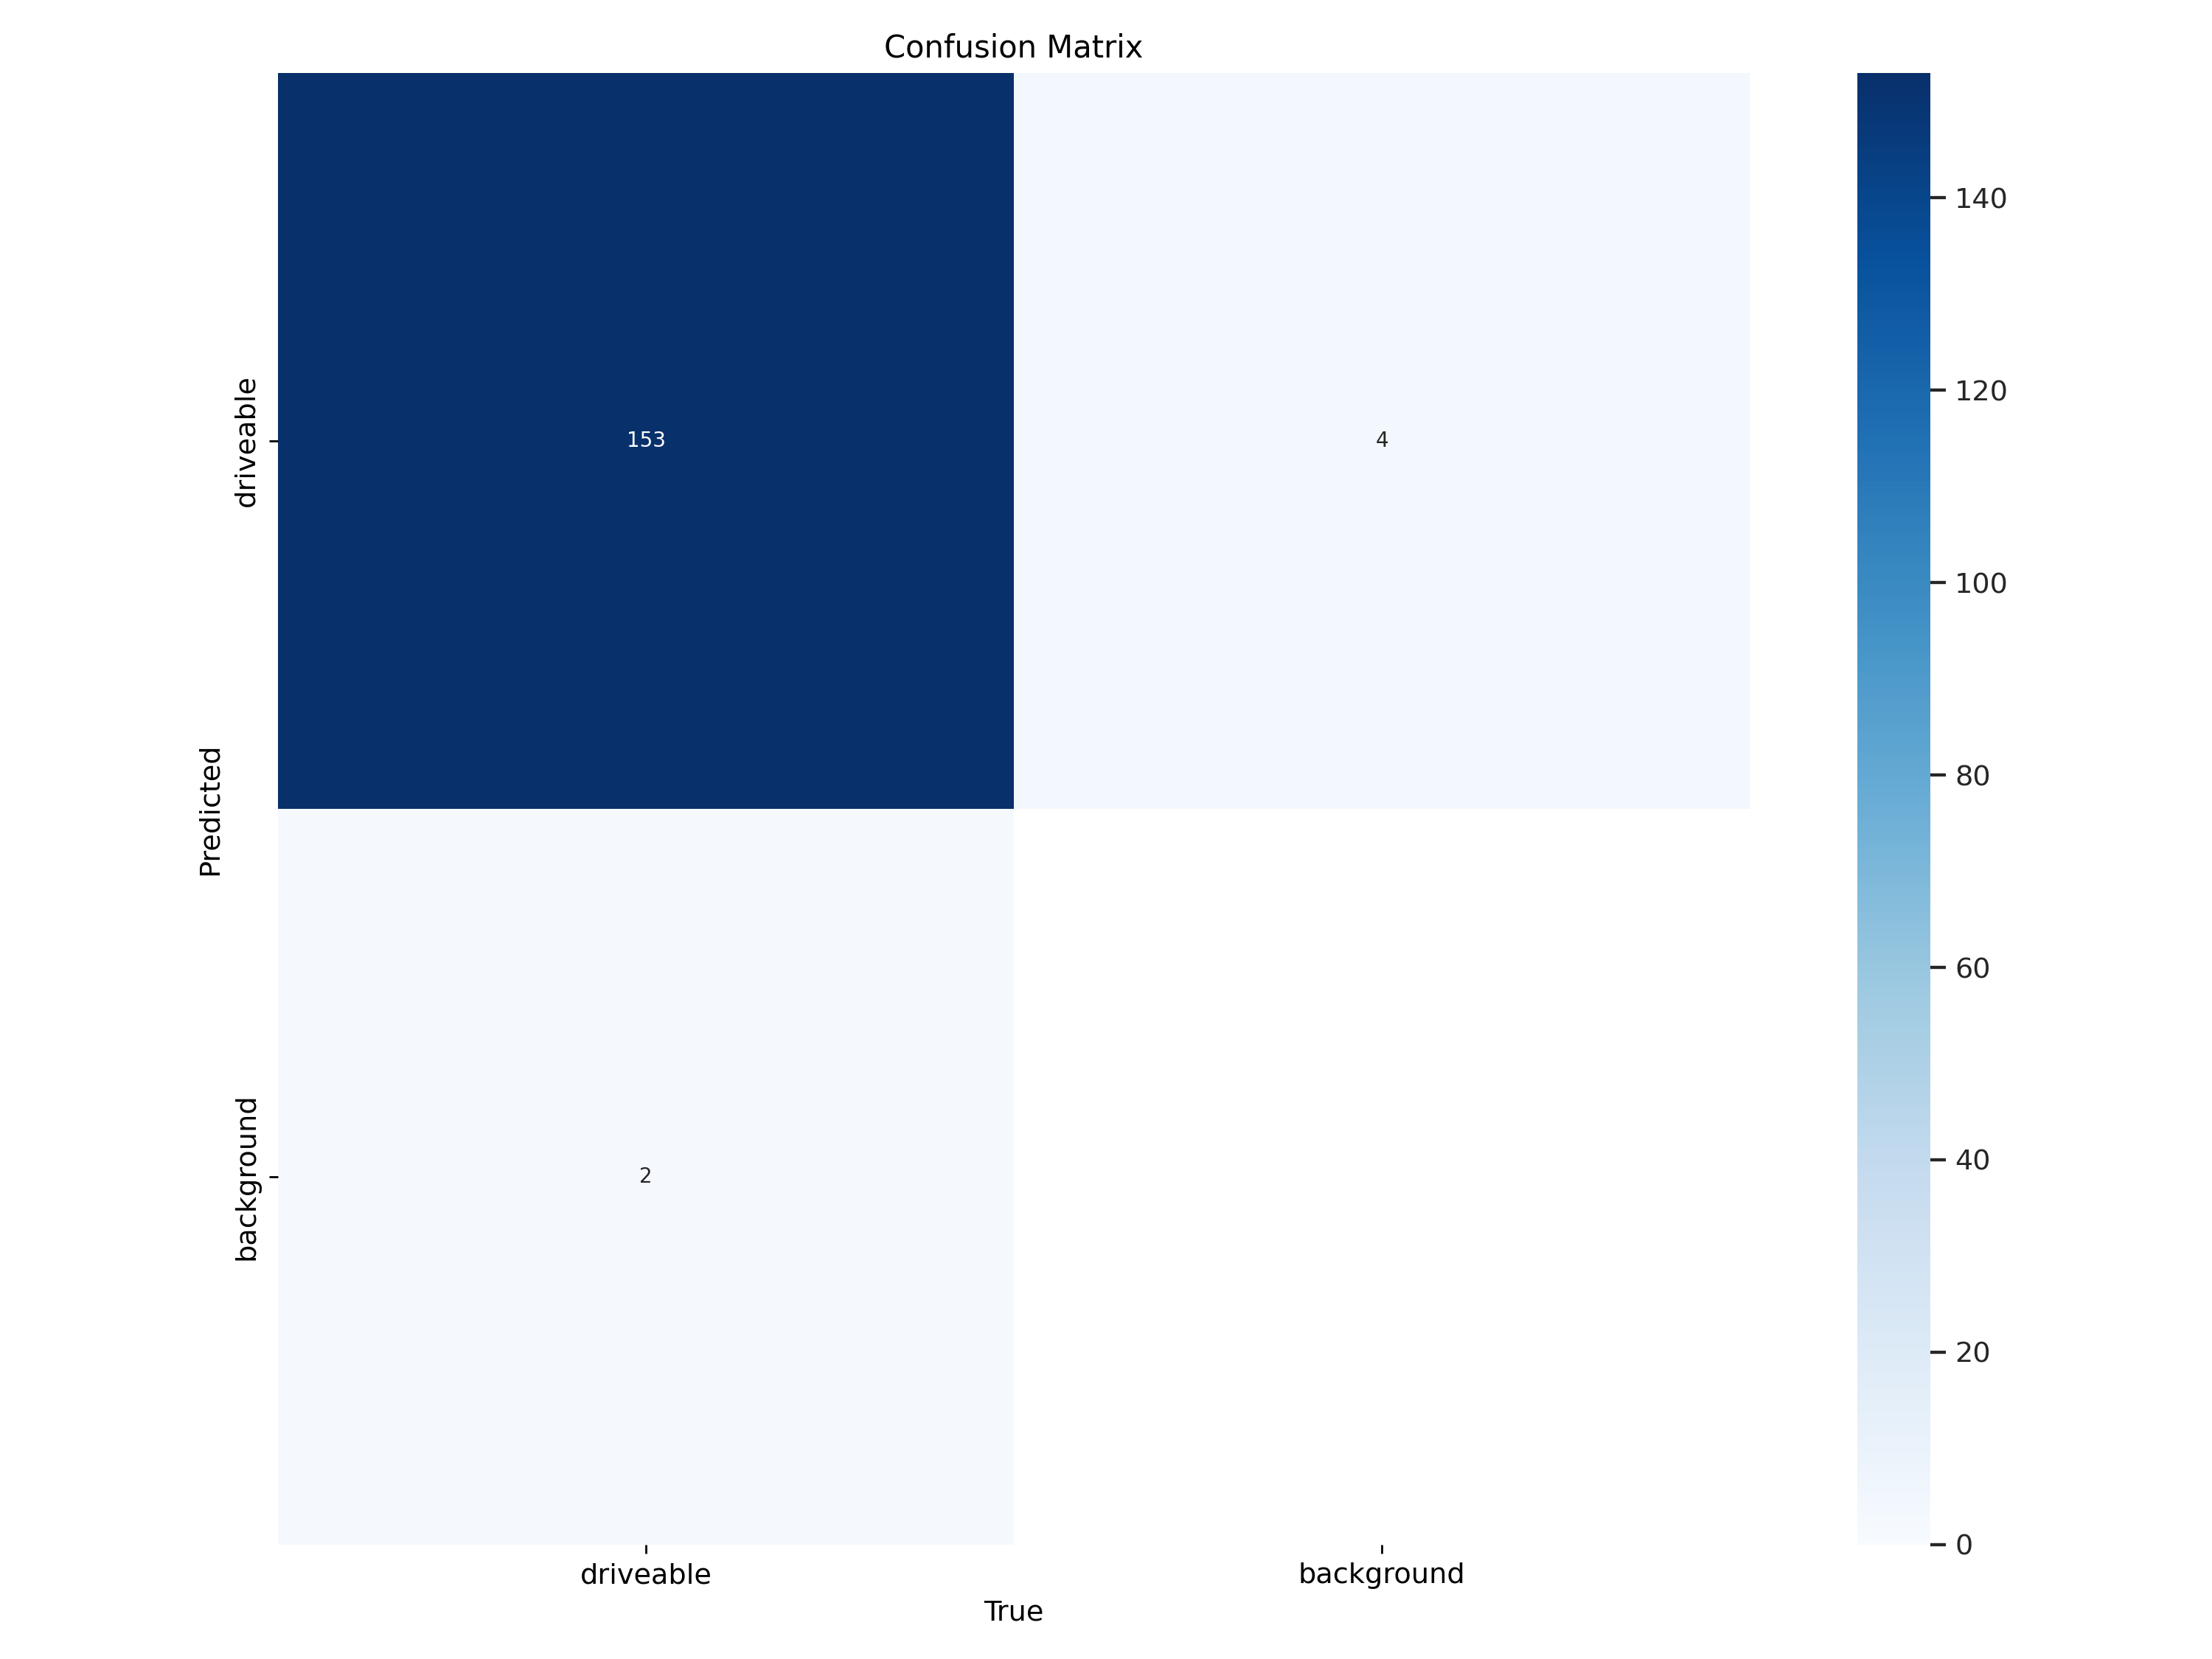

In [14]:

from IPython.display import display, Image
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content/datasets


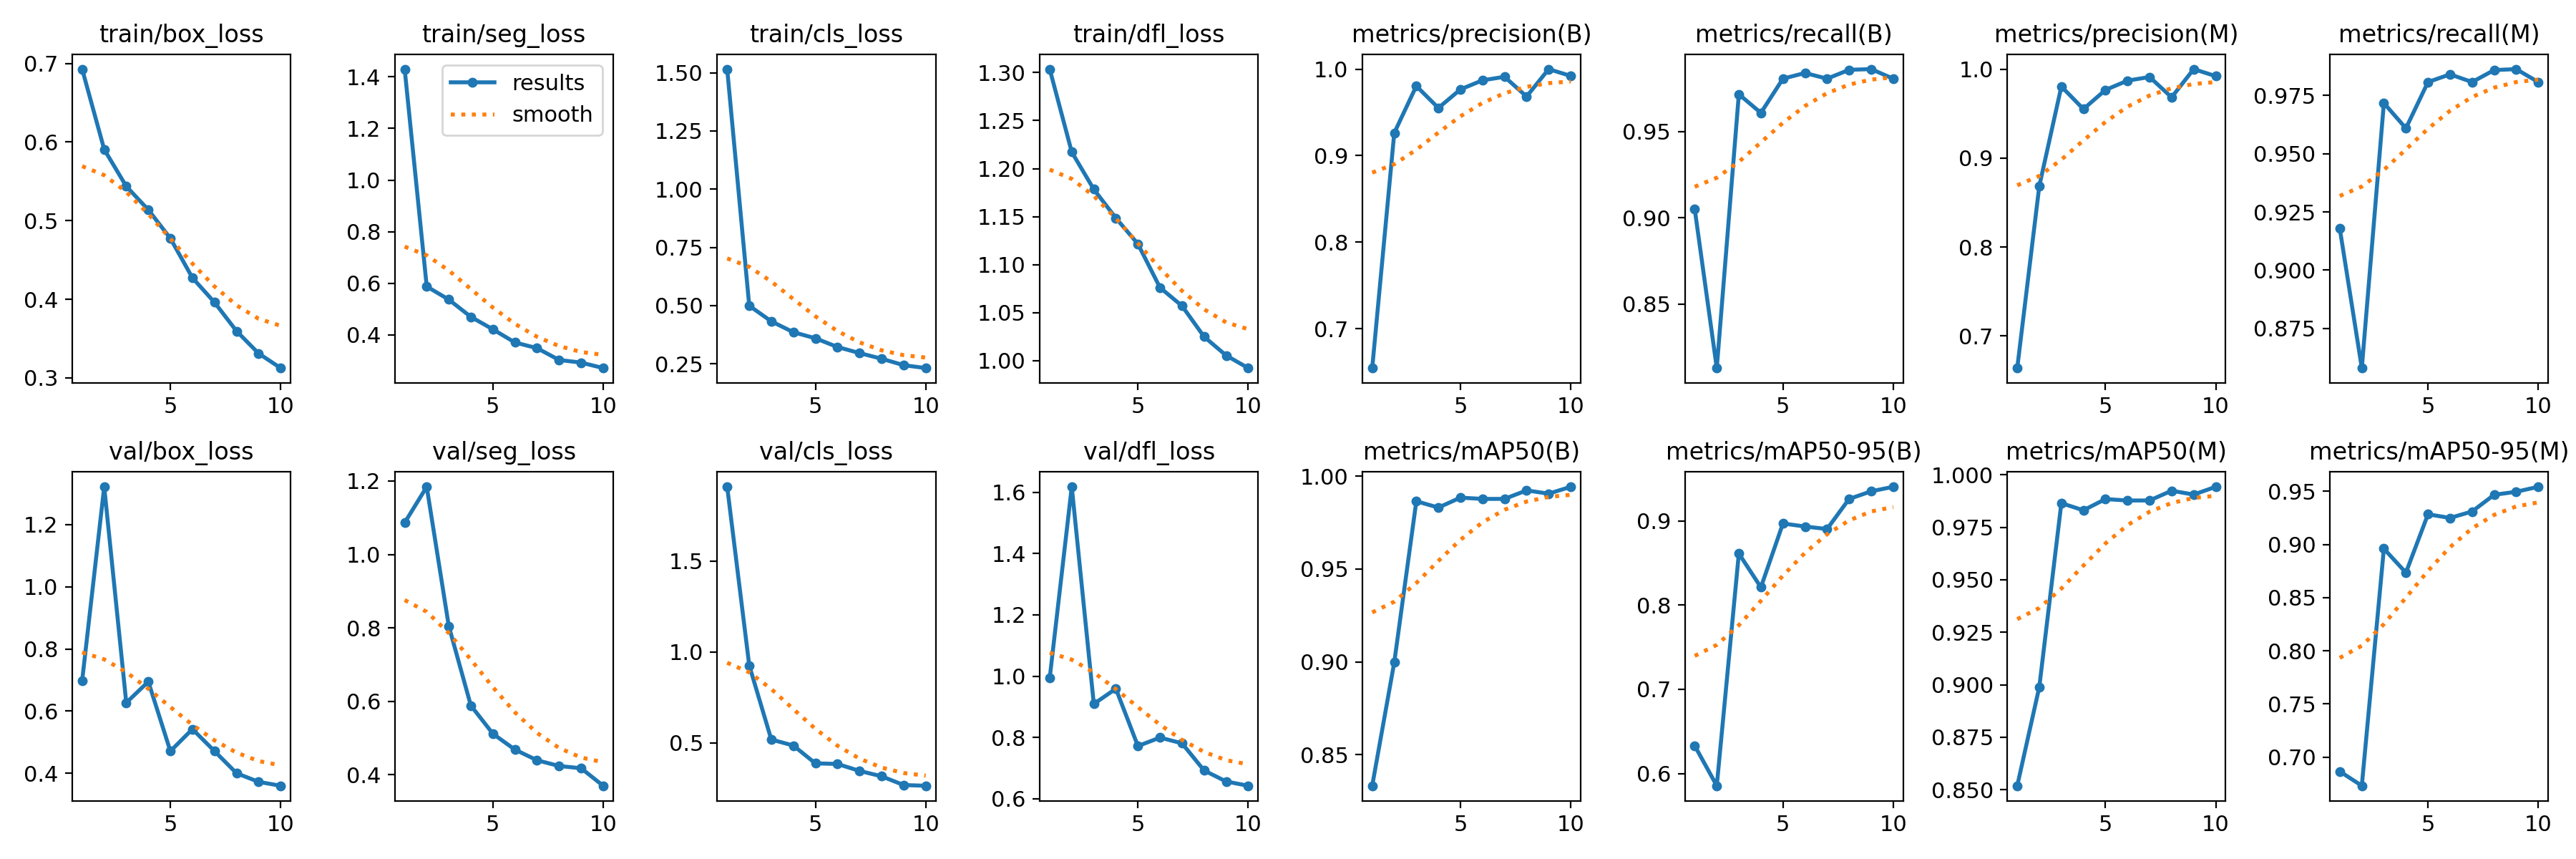

In [10]:
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/content/datasets


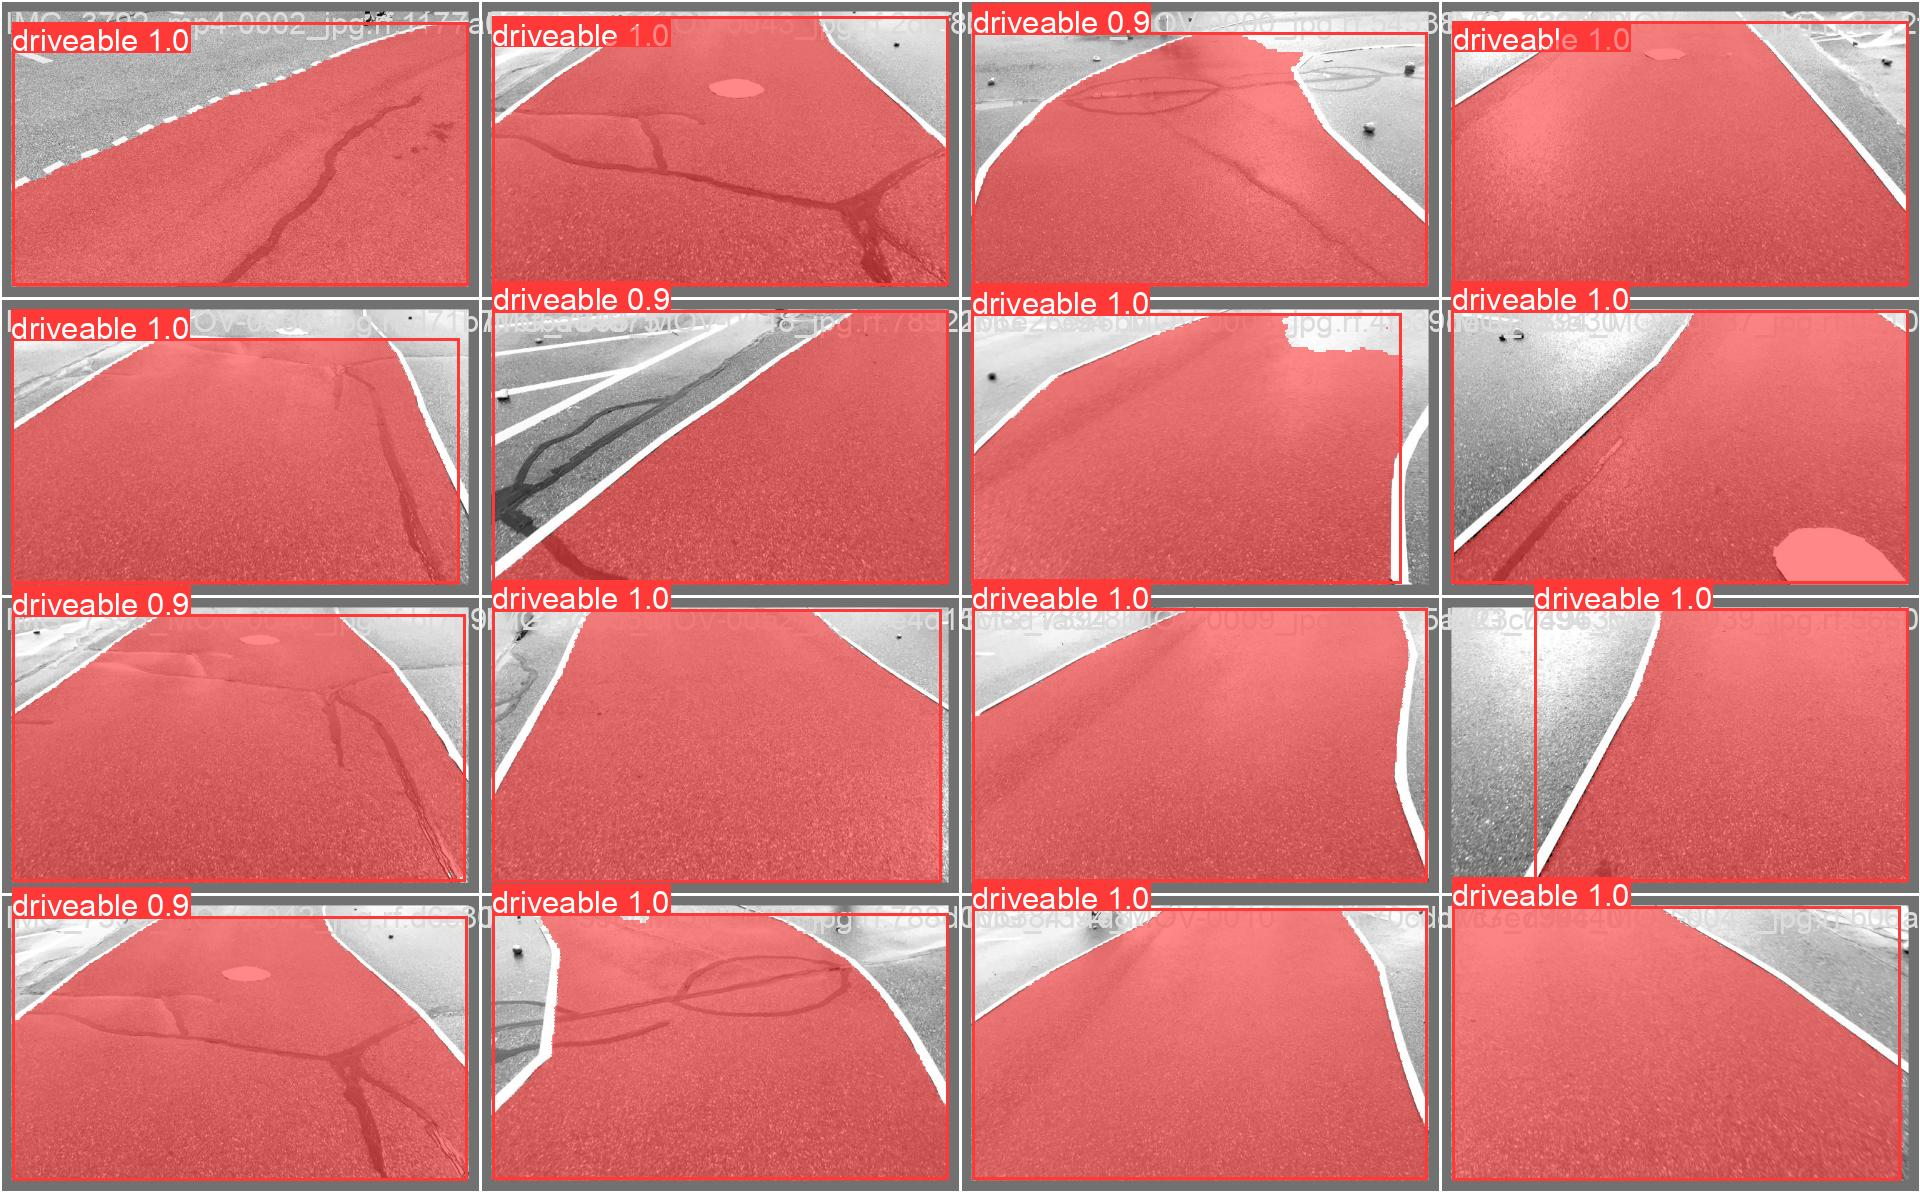

In [11]:
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

In [12]:
!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content/datasets
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/datasets/datasets/Drivable/Pothole-Model-7/valid/labels.cache... 155 images, 0 backgrounds, 0 corrupt: 100% 155/155 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 10/10 [00:06<00:00,  1.61it/s]
                   all        155        155      0.992      0.981      0.994      0.939      0.992      0.981      0.994      0.953
Speed: 2.4ms preprocess, 8.8ms inference, 0.0ms loss, 10.4ms postprocess per image
Results saved to runs/segment/val
💡 Learn more at https://docs.ultralytics.com/modes/val


/content/datasets
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 445, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 242, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/predictor.py", line 205, in predict_cli
    for _ in gen:  # running CLI inference without accumulating any outputs (do not modify)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 35, in generator_context
    respo